In [1]:
import os
import pandas as pd
import mglearn

In [2]:
data=pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "adult.data"),
    header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])
data=data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]
data.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [3]:
data_dummies=pd.get_dummies(data)

In [4]:
features=data_dummies.loc[:, 'age':'occupation_ Transport-moving']
X=features.values
y=data_dummies['income_ >50K'].values
print("X.shape: {} y.shape:{}".format(X.shape, y.shape))

X.shape: (32561, 44) y.shape:(32561,)


In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.preprocessing import OneHotEncoder

ct=ColumnTransformer(
    [("scaling", StandardScaler(), ['age','hours-per-week']),
     ("onehot", OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'])])

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# income을 제외한 모든 열을 추출합니다.
data_features=data.drop("income", axis=1)
# 데이터 프레임과 income을 분할합니다.
X_train, X_test, y_train, y_test=train_test_split(
    data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans=ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


In [8]:
logreg=LogisticRegression(max_iter=1000)
logreg.fit(X_train_trans, y_train)

X_test_trans=ct.transform(X_test)
print("테스트 점수: {:.2f}".format(logreg.score(X_test_trans, y_test)))

테스트 점수: 0.81


In [9]:
ct.named_transformers_.onehot

OneHotEncoder(sparse=False)

In [11]:
from sklearn.compose import make_column_transformer
ct=make_column_transformer(
    (StandardScaler(), ['age', 'hours-per-week']), (OneHotEncoder(sparse=False), ['workclass', 'education', 'gender','occupation'])
)

### 4.4. 구간 분할, 이산화 그리고 선형 모델, 트리 모델

c:\users\jpc10\ideaprojects\untitled\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\jpc10\ideaprojects\untitled\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\jpc10\ideaprojects\untitled\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\jpc10\ideaprojects\untitled\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\jpc10\ideaprojects\untitled\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missi

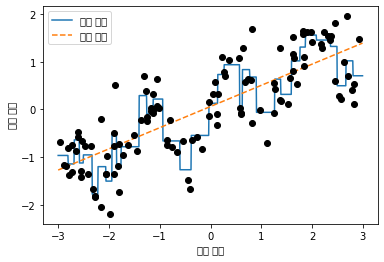

In [16]:

from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import numpy as np

X,y=mglearn.datasets.make_wave(n_samples=120)
line=np.linspace(-3, 3, 1000, endpoint=False).reshape(-1,1)

reg=DecisionTreeRegressor(min_samples_leaf=3).fit(X,y)
plt.plot(line, reg.predict(line), label="결정 트리")

reg=LinearRegression().fit(X,y)
plt.plot(line, reg.predict(line), '--', label="선형 회귀")
plt.plot(X[:,0],y,'o',c='k')
plt.ylabel('회귀 출력')
plt.xlabel("입력 특성")
plt.legend(loc="best")

In [17]:
from sklearn.preprocessing import KBinsDiscretizer

In [18]:
kb=KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
        -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
         2.92132162])                                                   ]


In [20]:
X_binned=kb.transform(X)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [21]:
print(X[:10])
X_binned.toarray()[:10]

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [22]:
kb=KBinsDiscretizer(n_bins=10, strategy='uniform',encode='onehot-dense')
kb.fit(X)
X_binned=kb.transform(X)

Text(0.5, 0, '입력 특성')

c:\users\jpc10\ideaprojects\untitled\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\jpc10\ideaprojects\untitled\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\jpc10\ideaprojects\untitled\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\jpc10\ideaprojects\untitled\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\jpc10\ideaprojects\untitled\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missi

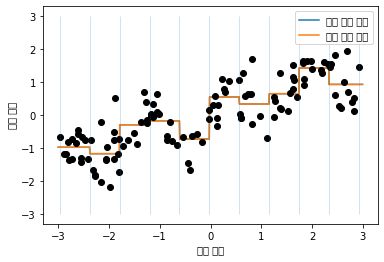

In [26]:
line_binned=kb.transform(line)

reg=LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='구간 선형 회귀')

reg=DecisionTreeRegressor(min_samples_split=3).fit(X_binned,y)
plt.plot(line, reg.predict(line_binned), label='구간 결정 트리')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3,3,linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")

### 4.5 상호작용과 다항식

In [27]:
X_combined=np.hstack([X, X_binned])
print(X_combined.shape)

(120, 11)


c:\users\jpc10\ideaprojects\untitled\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\jpc10\ideaprojects\untitled\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\jpc10\ideaprojects\untitled\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\jpc10\ideaprojects\untitled\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\jpc10\ideaprojects\untitled\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missi

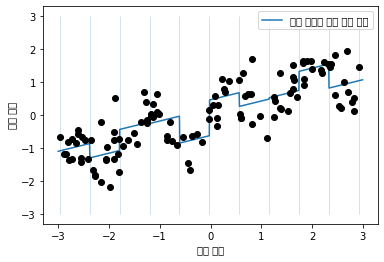

In [28]:
reg=LinearRegression().fit(X_combined, y)
line_combined=np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='원본 특성을 더한 선형 회귀')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.plot(X[:, 0],y, 'o', c='k')

In [29]:
X_product=np.hstack([X_binned,X*X_binned])
print(X_product.shape)

(120, 20)


c:\users\jpc10\ideaprojects\untitled\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\jpc10\ideaprojects\untitled\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\jpc10\ideaprojects\untitled\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\jpc10\ideaprojects\untitled\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\users\jpc10\ideaprojects\untitled\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missi

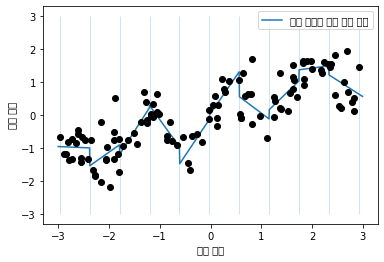

In [30]:
reg=LinearRegression().fit(X_product,y)

line_product=np.hstack([line_binned, line*line_binned])
plt.plot(line, reg.predict(line_product), label='원본 특성을 곱한 선형 회귀')

plt.vlines(kb.bin_edges_[0], -3,3,linewidth=1, alpha=.2)

plt.plot(X[:,0], y,'o',c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")